# GameIR-NVS Demo 

## six views of the scene

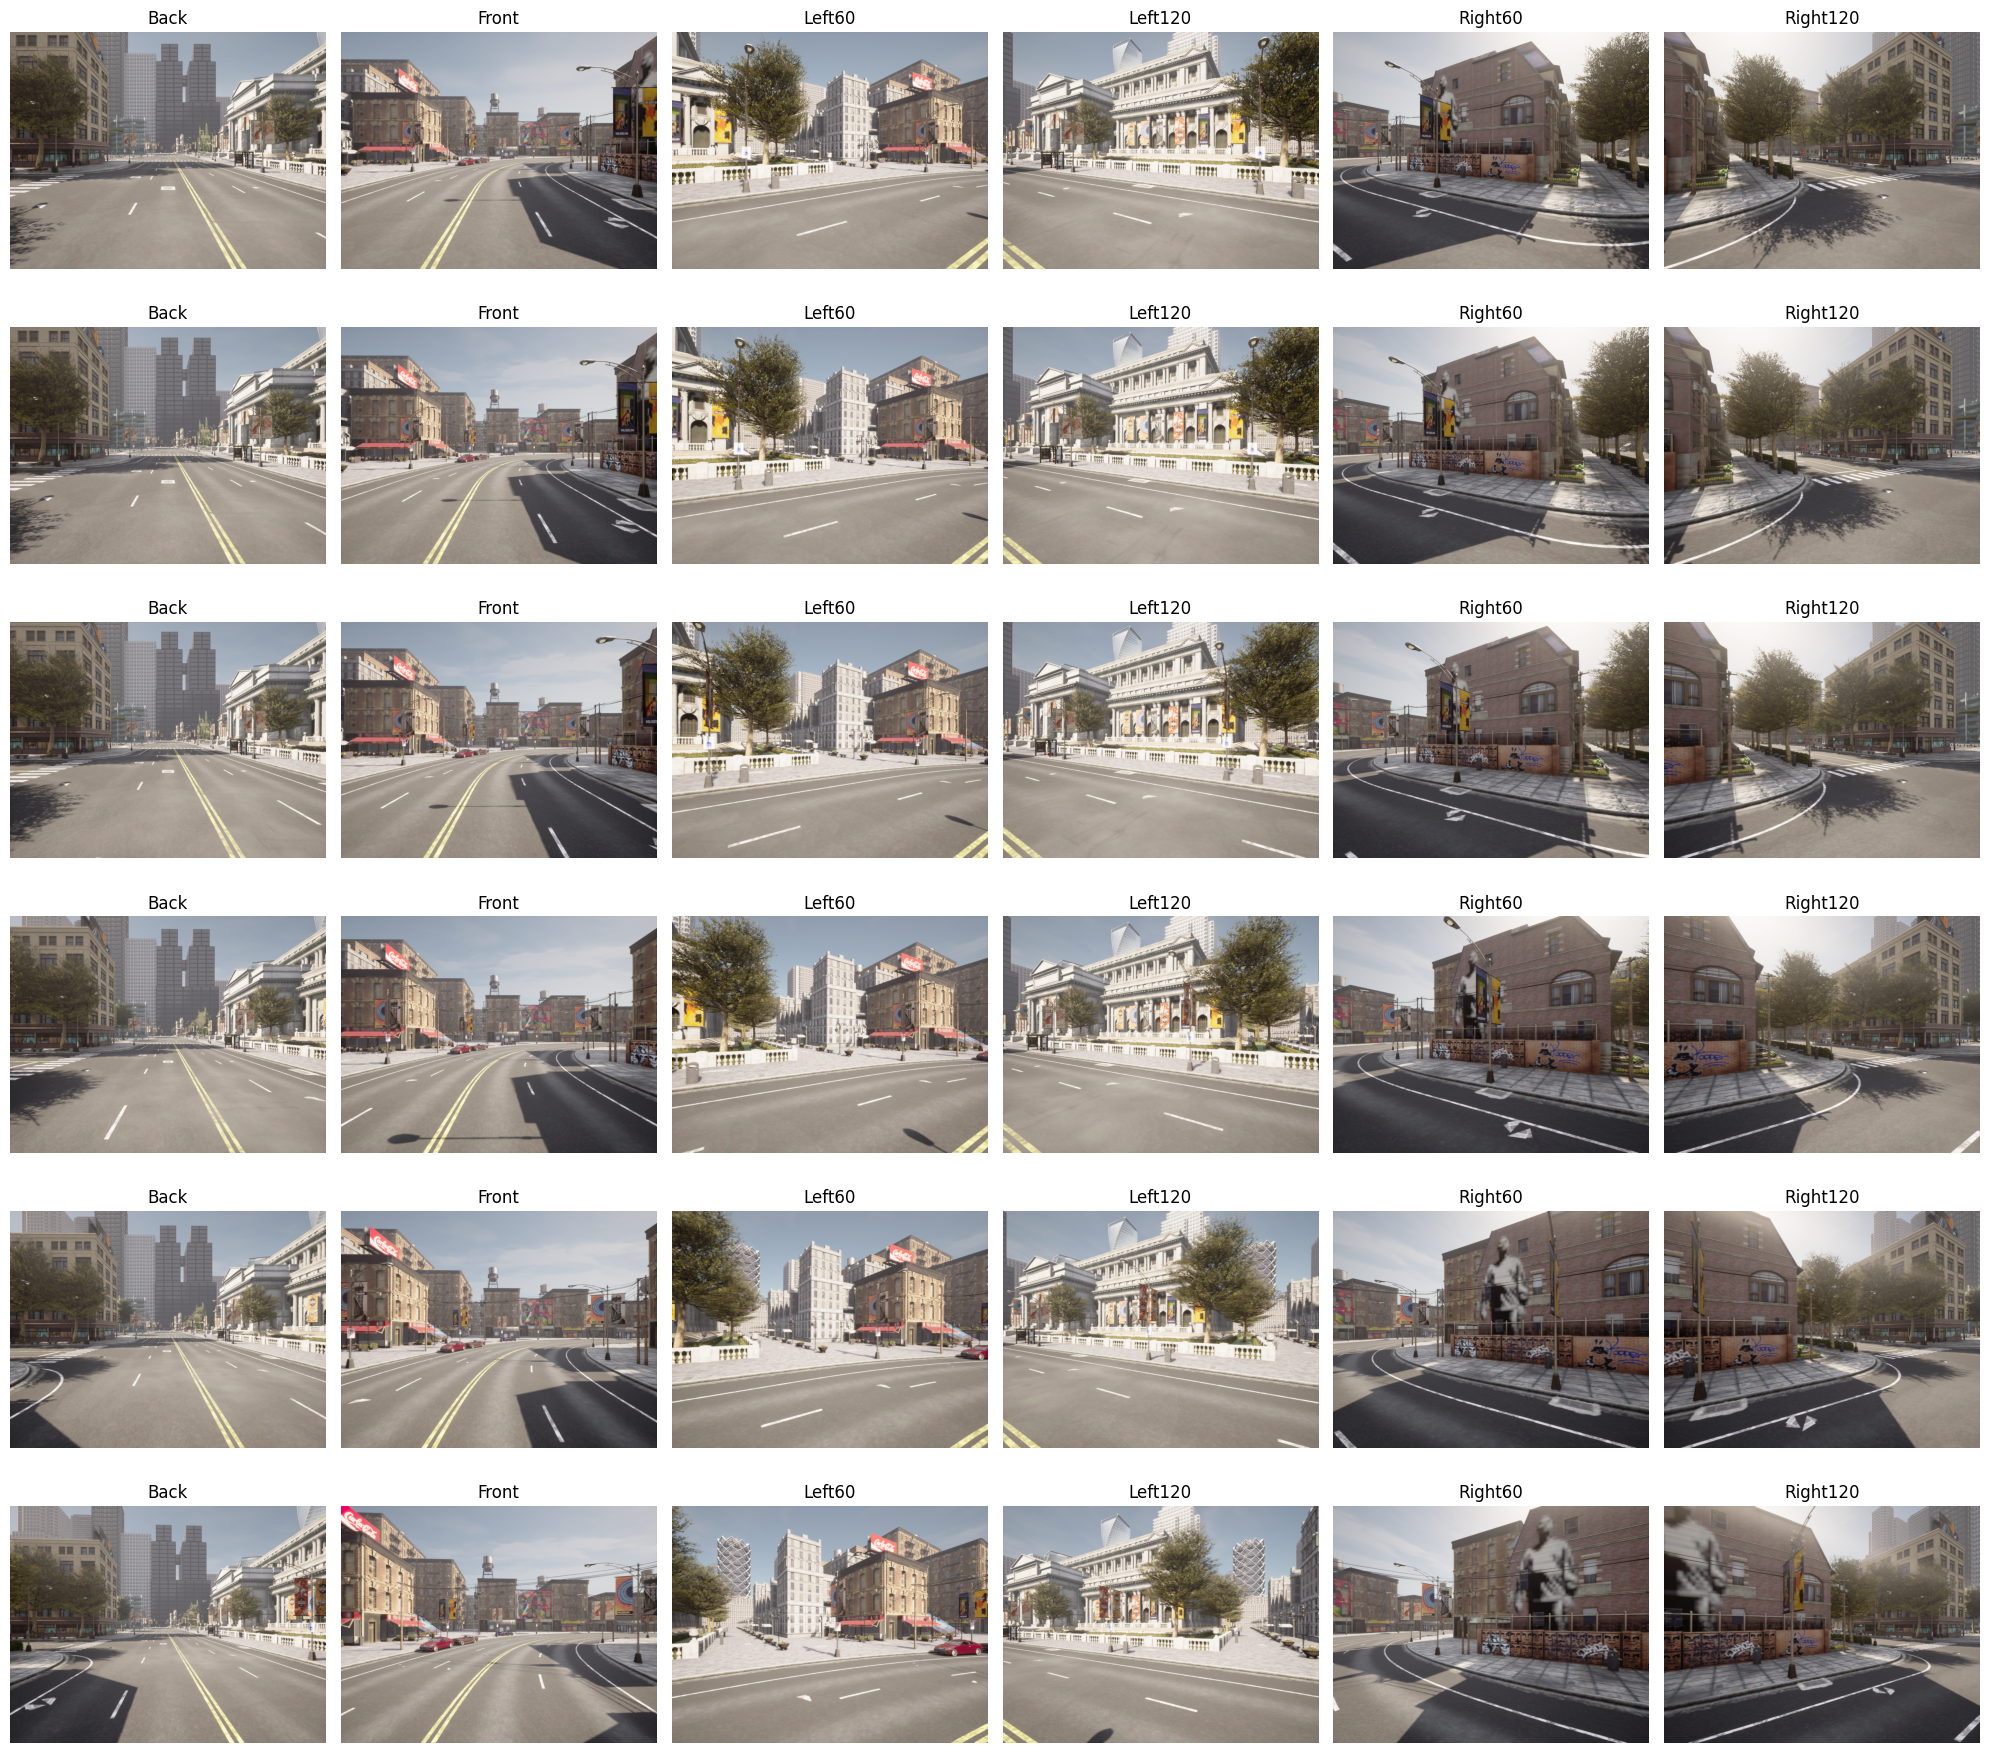

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the dataset directory
base_path = './GameIR-NVS_sample/static_town08/00'

# Define the views and their corresponding directories
views = ['back', 'front', 'left60', 'left120', 'right60', 'right120']

# Set up the plot
max_images = 0
for view in views:
    view_path = os.path.join(base_path, view)
    num_images = len([name for name in os.listdir(view_path) if name.endswith('rgb.png')])
    if num_images > max_images:
        max_images = num_images
fig, axs = plt.subplots(max_images, len(views), figsize=(20, max_images * 3)) 

# Loop through each view and load the images
for i, view in enumerate(views):
    view_path = os.path.join(base_path, view)
    image_files = sorted([img for img in os.listdir(view_path) if img.endswith('rgb.png')])
    for j, img_name in enumerate(image_files):
        img_name = image_files[j]
        img_path = os.path.join(view_path, img_name)
        img = Image.open(img_path)
        ax = axs[j, i] if max_images > 1 else axs[i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{view.capitalize()}")

plt.tight_layout()
plt.show()

## previews of images (rgb, segmentation map, depth map)

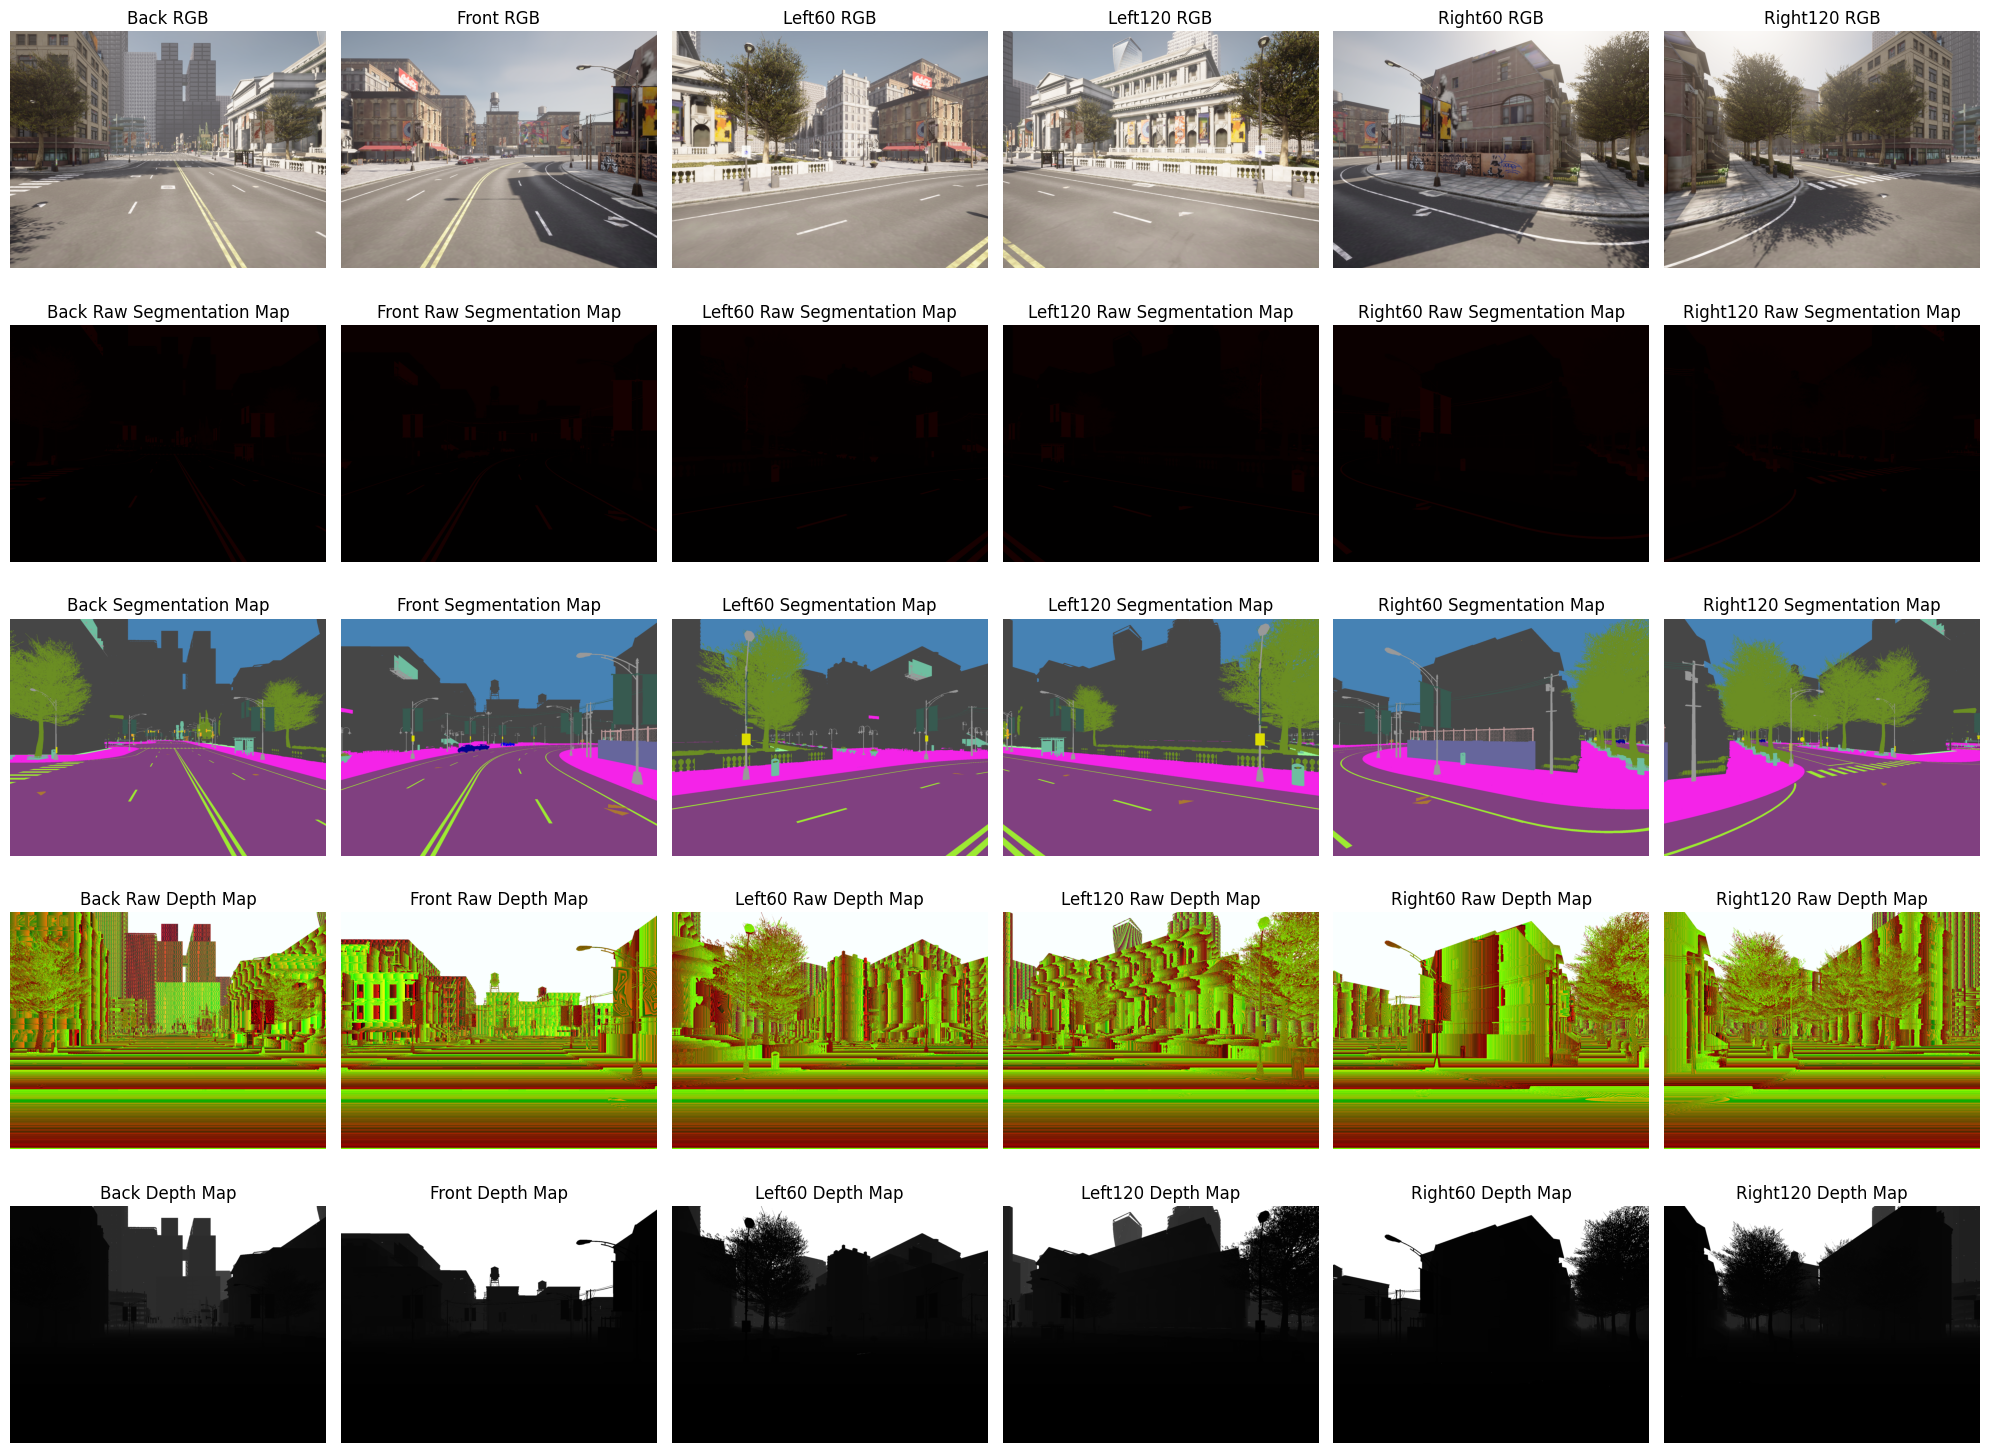

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils import get_segmentation_map, get_depth_map

# Set the path to the dataset directory
base_path = './GameIR-NVS_sample/static_town08/00'

# Define the views and their corresponding directories
views = ['back', 'front', 'left60', 'left120', 'right60', 'right120']

# Set up the plot with enough subplots
fig, axs = plt.subplots(5, len(views), figsize=(20, 15))  # 5 rows for rgb, raw seg map, seg map, raw depth map and depth map

# Loop through each view and load the first image for rgb, seg, and depth
for i, view in enumerate(views):
    view_path = os.path.join(base_path, view)
    
    rgb_files = sorted([img for img in os.listdir(view_path) if img.endswith('rgb.png')])
    seg_files = sorted([img for img in os.listdir(view_path) if img.endswith('seg.png')])
    depth_files = sorted([img for img in os.listdir(view_path) if img.endswith('depth.png')])
    
    img_rgb = Image.open(os.path.join(view_path, rgb_files[0]))
    axs[0, i].imshow(img_rgb)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"{view.capitalize()} RGB")
    
    img_raw_seg = Image.open(os.path.join(view_path, seg_files[0]))
    axs[1, i].imshow(img_raw_seg)
    axs[1, i].axis('off')
    axs[1, i].set_title(f"{view.capitalize()} Raw Segmentation Map")

    img_seg = get_segmentation_map(np.array(img_raw_seg), colorize=True)
    axs[2, i].imshow(img_seg)
    axs[2, i].axis('off')
    axs[2, i].set_title(f"{view.capitalize()} Segmentation Map")
    
    img_raw_depth = Image.open(os.path.join(view_path, depth_files[0]))
    axs[3, i].imshow(img_raw_depth)
    axs[3, i].axis('off')
    axs[3, i].set_title(f"{view.capitalize()} Raw Depth Map")

    img_depth = get_depth_map(np.array(img_raw_depth))
    axs[4, i].imshow(img_depth, cmap='gray')
    axs[4, i].axis('off')
    axs[4, i].set_title(f"{view.capitalize()} Depth Map")

plt.tight_layout()
plt.show()


## preview of camera matrices (extrinsic_matrix and intrinsic_matrix)

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json

# Set the path to the dataset directory
base_path = './GameIR-NVS_sample/static_town08/00'

# Define the views and their corresponding directories
views = ['back', 'front', 'left60', 'left120', 'right60', 'right120']

# Loop through each view and load the JSON file of first image 
for i, view in enumerate(views):
    view_path = os.path.join(base_path, view)
    
    # Find the JSON file of first image
    json_files = sorted([j for j in os.listdir(view_path) if j.endswith('.json')])
    
    # Load the corresponding JSON file for matrices
    with open(os.path.join(view_path, json_files[0]), 'r') as f:
        data = json.load(f)
        extrinsic_matrix = data['extrinsic_matrix']
        intrinsic_matrix = data['intrinsic_matrix']
        print(f"{view.capitalize()} Extrinsic Matrix:")
        print(np.array(extrinsic_matrix))
        print(f"{view.capitalize()} Intrinsic Matrix:")
        print(np.array(intrinsic_matrix))
        print("\n")

plt.tight_layout()
plt.show()

Back Extrinsic Matrix:
[[-9.99976738e-01 -2.20525178e-16  6.81962853e-03 -1.02317673e+02]
 [ 6.81962853e-03  2.23553701e-16  9.99976738e-01  8.04147258e+01]
 [-2.22044605e-16  1.00000000e+00 -2.22044605e-16  2.90180635e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Back Intrinsic Matrix:
[[960.   0. 960.   0.]
 [  0. 960. 720.   0.]
 [  0.   0.   0.   1.]]


Front Extrinsic Matrix:
[[ 9.99976747e-01  2.20525319e-16 -6.81900042e-03 -1.02317670e+02]
 [-6.81900042e-03 -2.23553564e-16 -9.99976747e-01  8.04147302e+01]
 [-2.22044605e-16  1.00000000e+00 -2.22044605e-16  2.90180635e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Front Intrinsic Matrix:
[[960.   0. 960.   0.]
 [  0. 960. 720.   0.]
 [  0.   0.   0.   1.]]


Left60 Extrinsic Matrix:
[[ 5.05893952e-01  3.03865741e-16  8.62595684e-01 -1.02317675e+02]
 [ 8.62595684e-01  7.92036950e-17 -5.05893952e-01  8.04147282e+01]
 [-2.22044605e-16  1.00000000e+00 -2.22044605e-16  2.90180635e+00

<Figure size 640x480 with 0 Axes>